# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [6]:
data_path = "Wholesale_Data.csv"
df = pd.read_csv(data_path)

In [7]:
display(df.head())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [8]:
print(df.info())
print(df.describe())
print("Missing values per column:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2

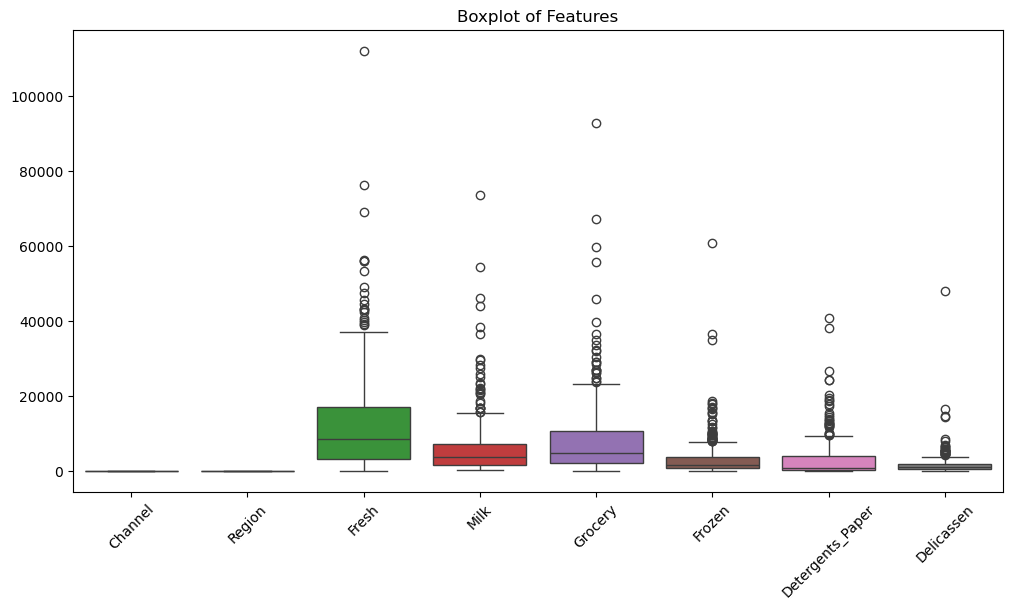

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot of Features")
plt.show()

In [10]:
from scipy.stats import zscore
df_zscore = df.iloc[:, 2:].apply(zscore)
outliers = (df_zscore.abs() > 3).sum()
print("Outliers per column:\n", outliers)

Outliers per column:
 Fresh                7
Milk                 9
Grocery              7
Frozen               6
Detergents_Paper    10
Delicassen           4
dtype: int64


In [11]:
threshold = 3
df_no_outliers = df[(df_zscore.abs() <= threshold).all(axis=1)]
print(f"Data shape after removing outliers: {df_no_outliers.shape}")

Data shape after removing outliers: (414, 8)


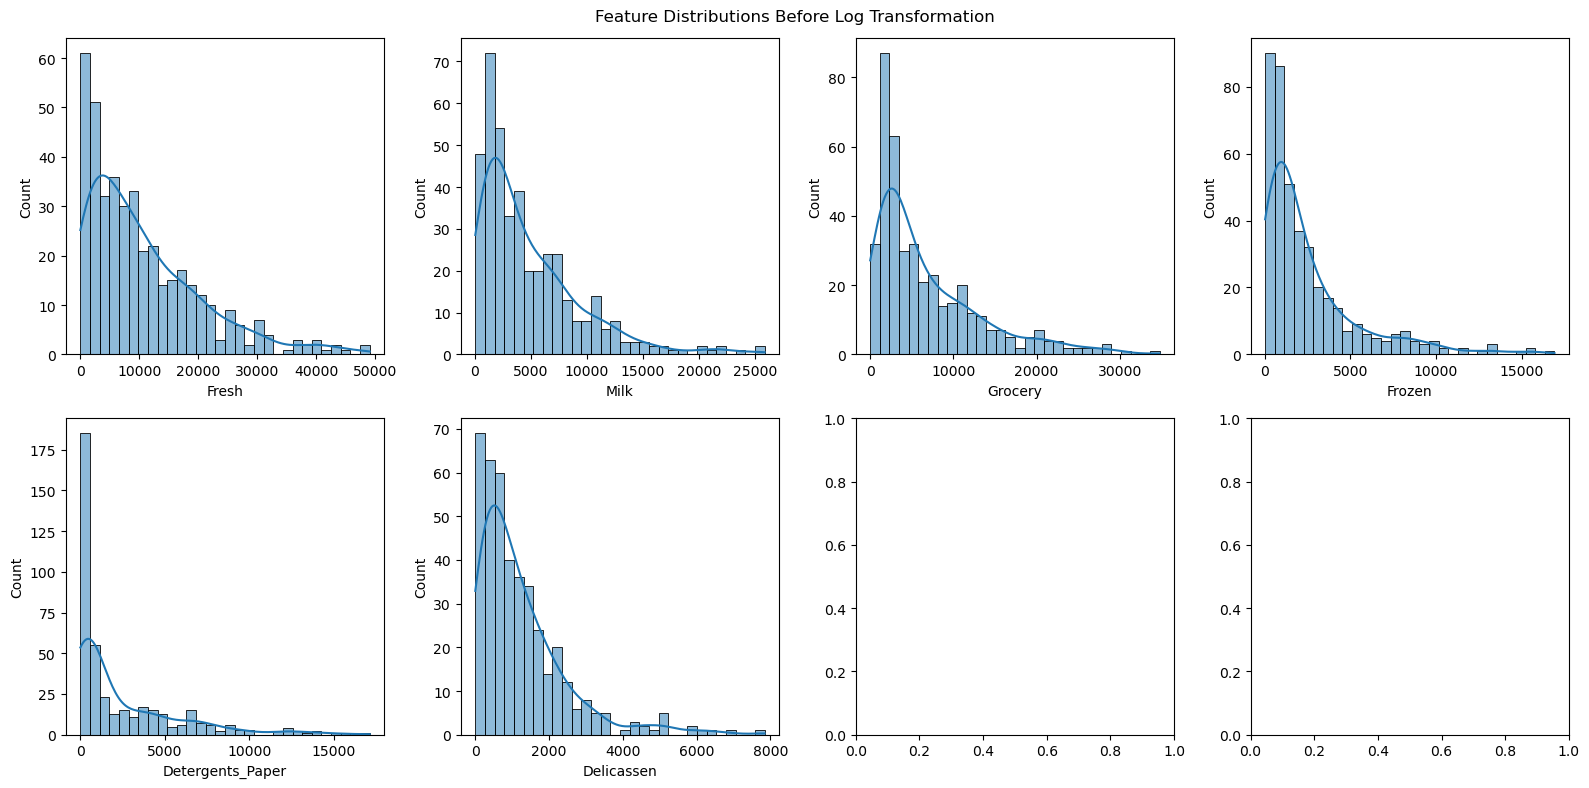

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(16,8))
fig.suptitle("Feature Distributions Before Log Transformation")
for i, col in enumerate(df_no_outliers.columns[2:]):
    sns.histplot(df_no_outliers[col], bins=30, kde=True, ax=axes[i//4, i%4])
plt.tight_layout()
plt.show()

In [13]:
df_transformed = df_no_outliers.iloc[:, 2:].apply(lambda x: np.log1p(x))

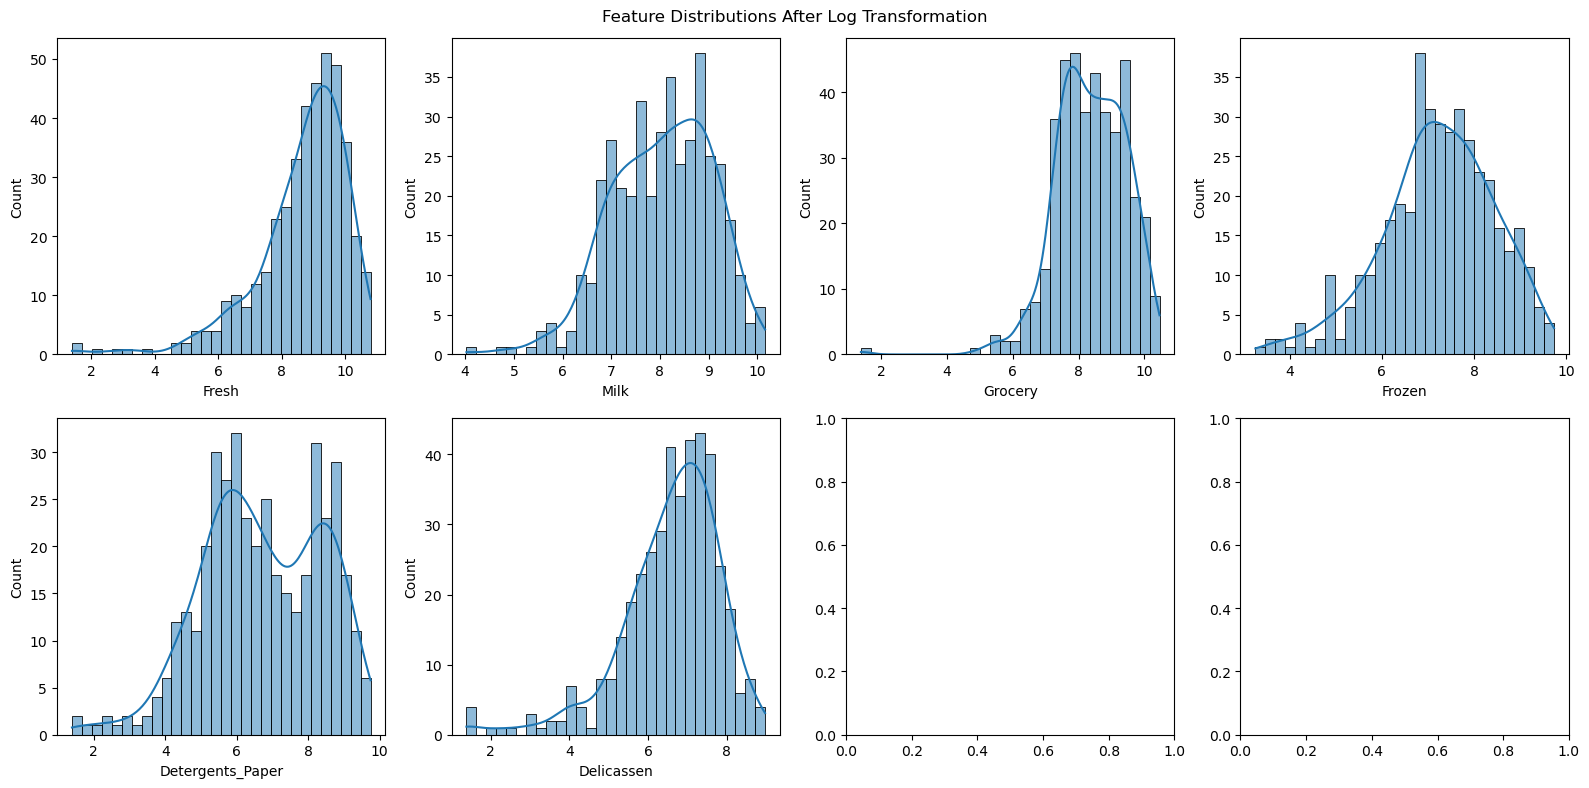

In [14]:
fig, axes = plt.subplots(2, 4, figsize=(16,8))
fig.suptitle("Feature Distributions After Log Transformation")
for i, col in enumerate(df_transformed.columns):
    sns.histplot(df_transformed[col], bins=30, kde=True, ax=axes[i//4, i%4])
plt.tight_layout()
plt.show()

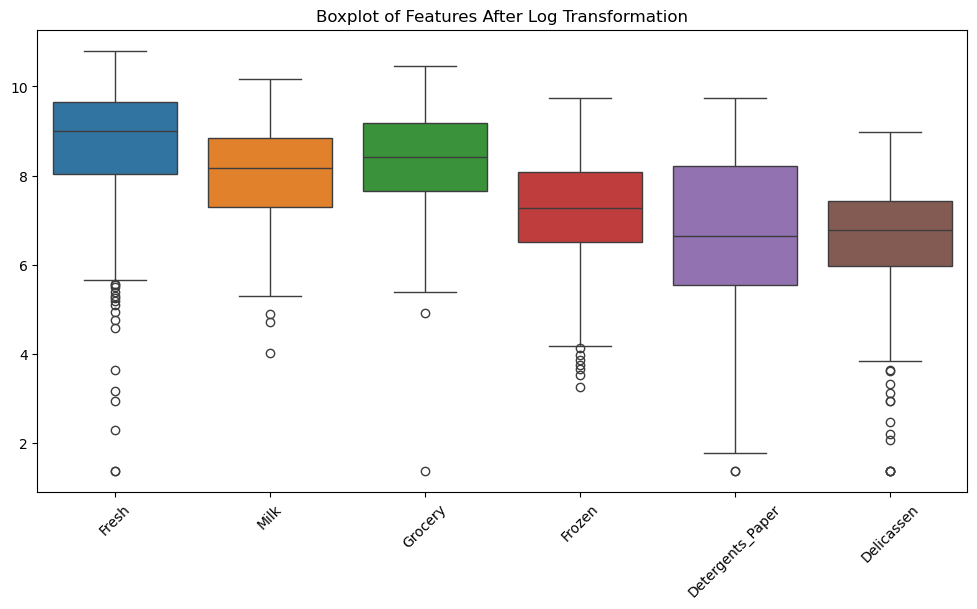

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_transformed)
plt.xticks(rotation=45)
plt.title("Boxplot of Features After Log Transformation")
plt.show()

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [18]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_transformed)

In [19]:
optimal_k = 3  # Adjust based on Elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_no_outliers = df_no_outliers.copy()
df_no_outliers.loc[:, "Cluster_KMeans"] = kmeans.fit_predict(df_scaled)

In [20]:
def assign_labels(cluster_column):
    label_mapping = {
        0: "High Fresh Spenders",
        1: "Grocery & Detergents Buyers",
        2: "Balanced Shoppers"
    }
    return cluster_column.map(label_mapping)

In [21]:
df_no_outliers.loc[:, "Cluster_Label"] = assign_labels(df_no_outliers["Cluster_KMeans"])

In [22]:
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
df_no_outliers["Cluster_Hierarchical"] = hierarchical.fit_predict(df_scaled)

In [23]:
silhouette_avg = silhouette_score(df_scaled, df_no_outliers["Cluster_KMeans"])
silhouette_hierarchical = silhouette_score(df_scaled, df_no_outliers["Cluster_Hierarchical"])
print(f"Silhouette Score for K-Means: {silhouette_avg:.4f}")
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical:.4f}")

Silhouette Score for K-Means: 0.2524
Silhouette Score for Hierarchical Clustering: 0.2757


In [24]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_no_outliers.loc[:, "PCA1"] = df_pca[:, 0]
df_no_outliers.loc[:, "PCA2"] = df_pca[:, 1]
centroids_pca = pca.transform(kmeans.cluster_centers_)

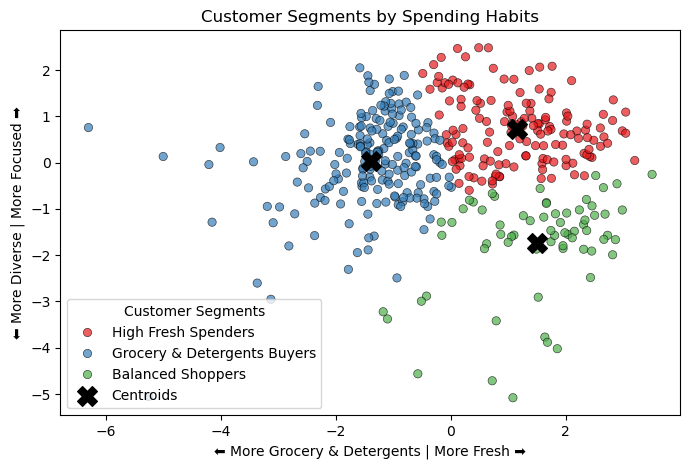

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_no_outliers["PCA1"], y=df_no_outliers["PCA2"], hue=df_no_outliers["Cluster_Label"], palette='Set1', edgecolor='black', alpha=0.7)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.xlabel("⬅ More Grocery & Detergents | More Fresh ➡")
plt.ylabel("⬅ More Diverse | More Focused ➡")
plt.title("Customer Segments by Spending Habits")
plt.legend(title='Customer Segments')
plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

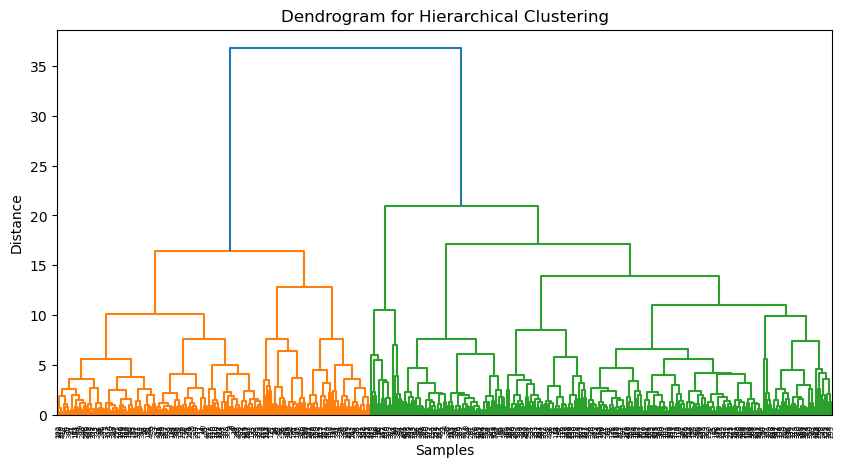

In [28]:
plt.figure(figsize=(10, 5))
linked = linkage(df_scaled, method='ward')
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [31]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
pca_components = pd.DataFrame(pca.components_, columns=df_transformed.columns, index=["PCA1", "PCA2"])
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("PCA Component Contributions:\n", pca_components)

Explained Variance Ratio: [0.43932435 0.24992615]
PCA Component Contributions:
          Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
PCA1 -0.169646  0.530718  0.566421 -0.205214          0.548100    0.161862
PCA2  0.575413  0.186448  0.037268  0.546734         -0.006862    0.577739


In [32]:
cluster_summary = df_no_outliers.groupby("Cluster_Label")[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]].mean()
print("Cluster Spending Averages:")
display(cluster_summary)

Cluster Spending Averages:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster_Label,,,,,,
Balanced Shoppers,2584.134328,7026.179104,11386.955224,568.731343,4875.582090,734.388060
Grocery & Detergents Buyers,12104.234694,1848.887755,2330.658163,3147.479592,401.816327,867.673469
High Fresh Spenders,12510.602649,7839.993377,10604.496689,2653.291391,3822.284768,1941.980132


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

Key Insights:
1. K-Means and Hierarchical clustering show clear groupings of customer purchasing behavior.
2. PCA helped reduce dimensions while retaining most of the variance.
3. Silhouette Score indicates cluster separation quality.
4. The dataset reveals strong correlations between certain product categories, influencing cluster formation.